In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from os import path
import pandas as pd
from collections import defaultdict
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# working directory
data_directory = '/Users/lukas/OneDrive/Desktop/Upload'

In [3]:
extrinsic = '#1170aa'
intrinsic = '#fc7d0b'
personal = '#a3acb9'

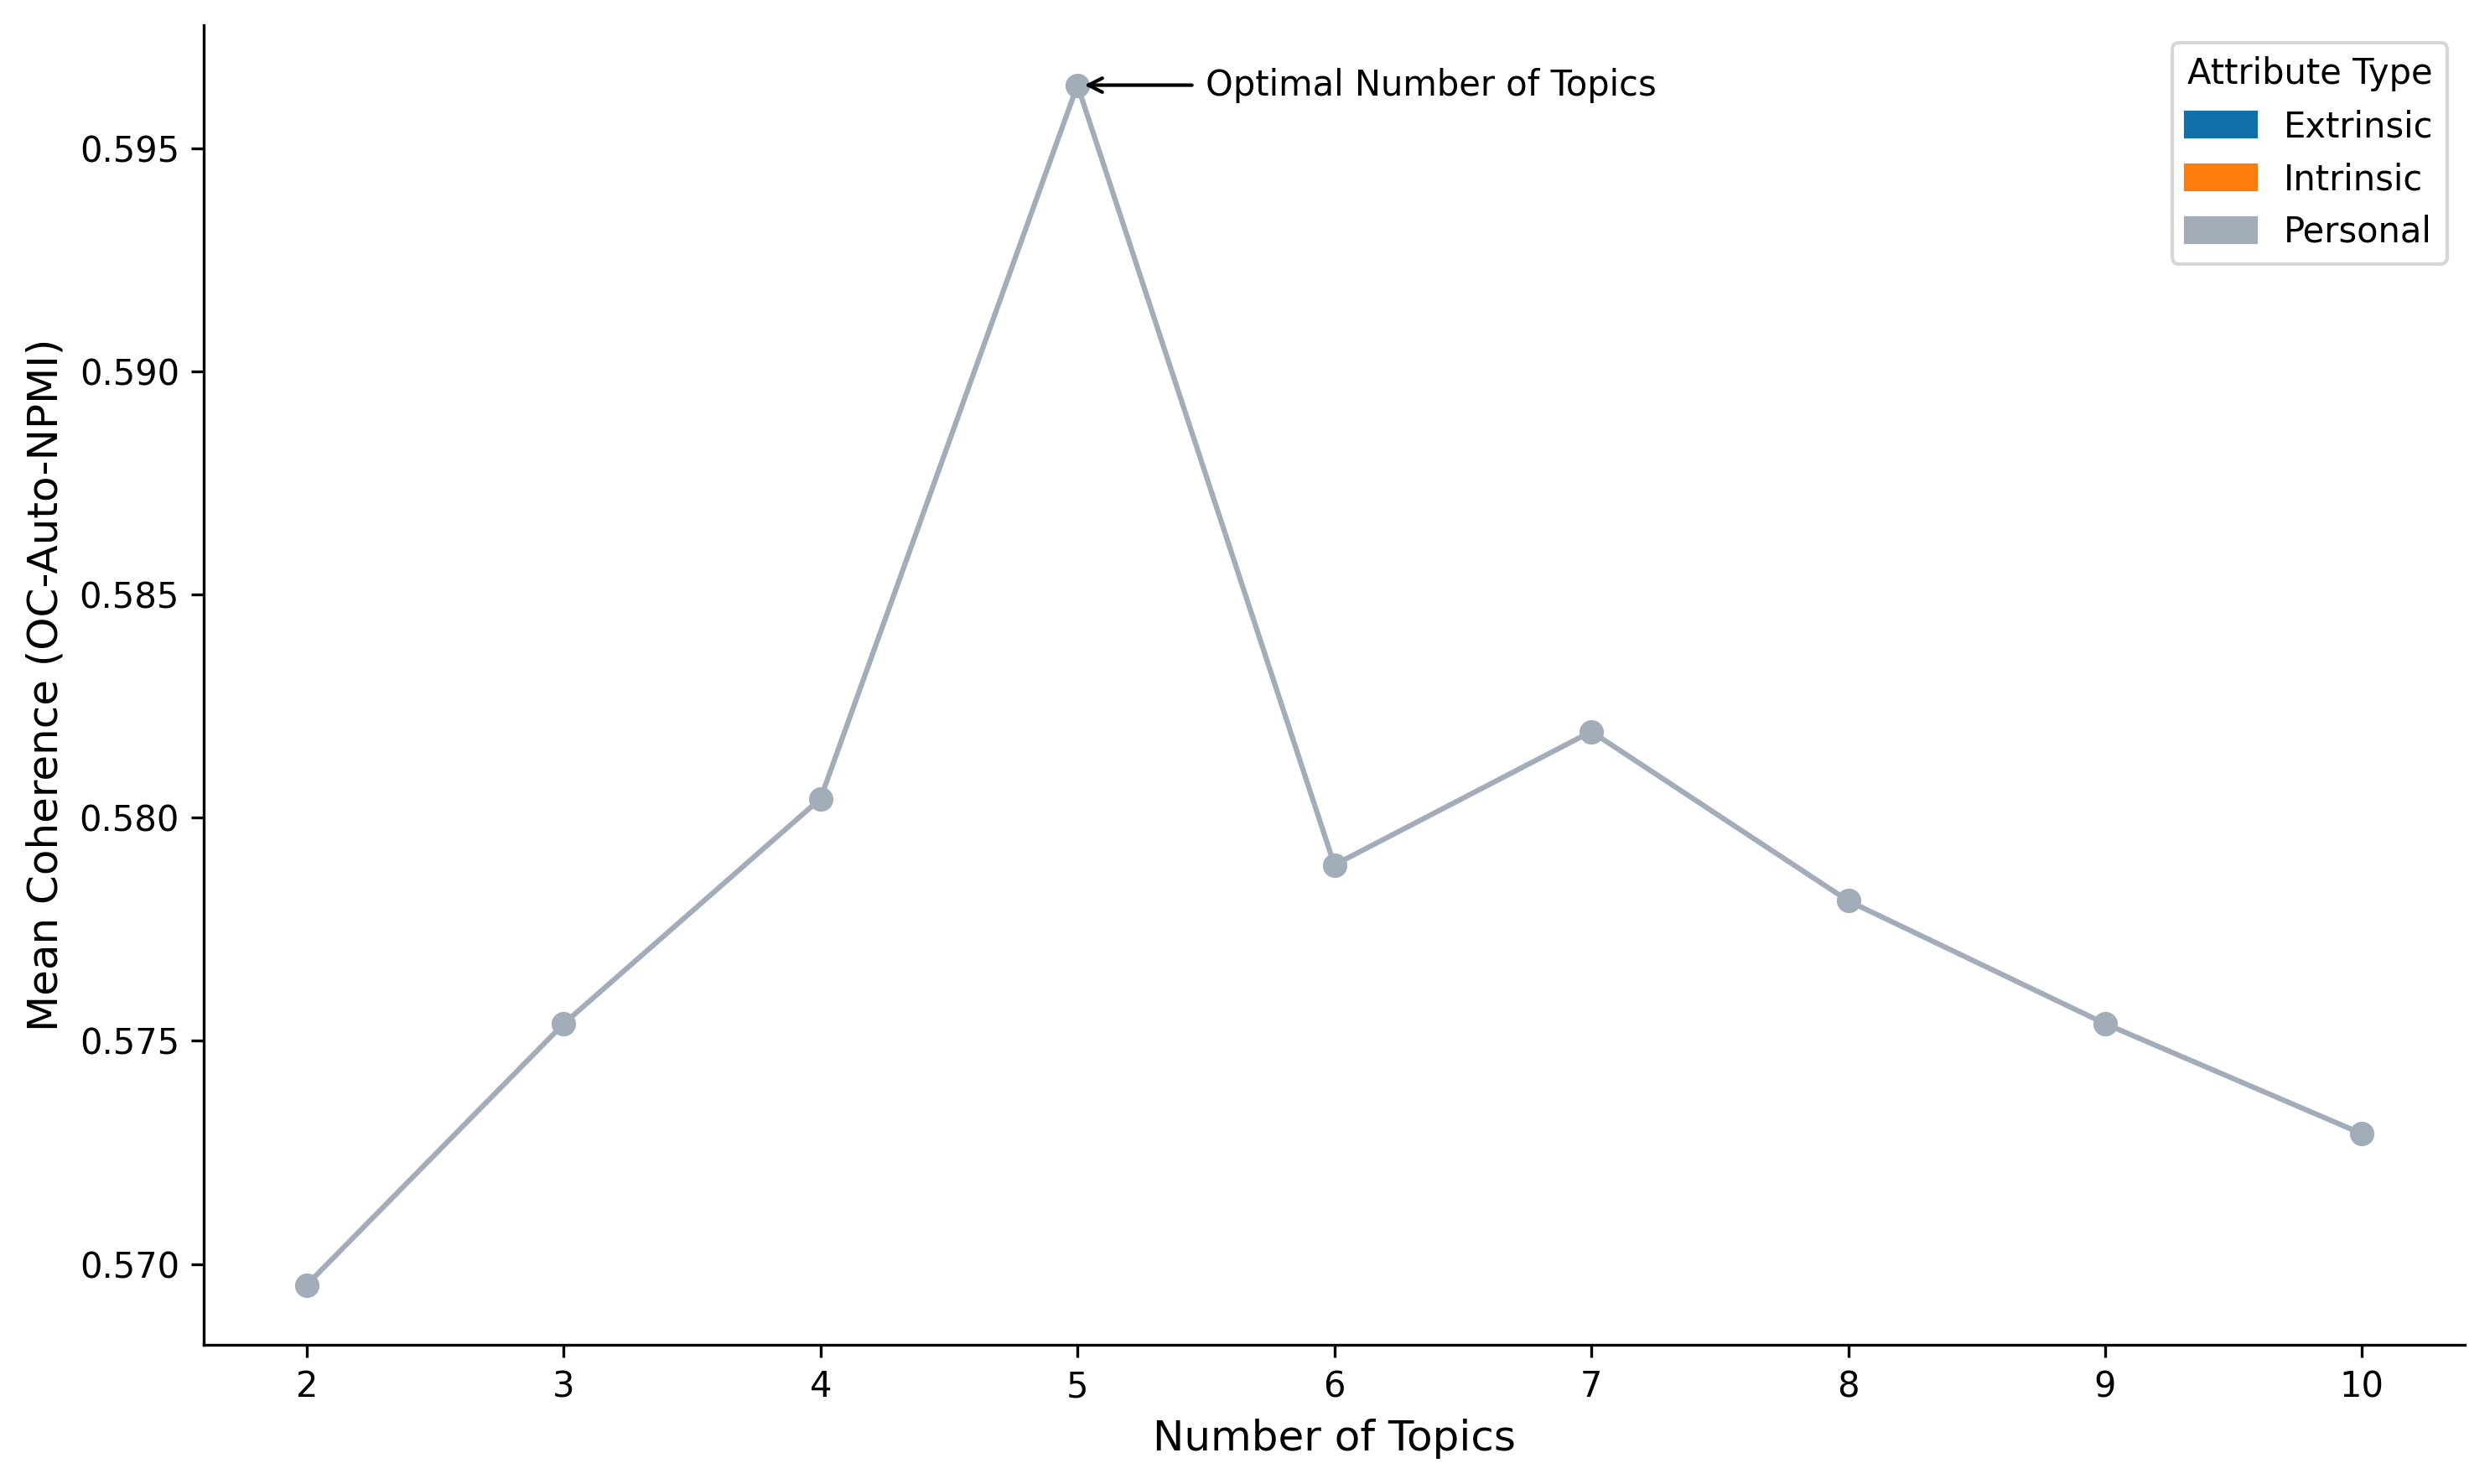

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from os import path

import matplotlib.patches as mpatches



extrinsic_patch = mpatches.Patch(color=extrinsic, label='Extrinsic')
intrinsic_patch = mpatches.Patch(color=intrinsic, label='Intrinsic')
personal_patch = mpatches.Patch(color=personal, label='Personal')

# Assuming 'data_directory' is defined and contains your CSV file
lda_tuning_results = pd.read_csv(path.join(data_directory, 'lda_tuning_results.csv'))

df = lda_tuning_results.groupby('Topics').agg(mean=('Coherence', 'mean')).reset_index()

# Create the line plot with sharper aesthetics
plt.figure(figsize=(10, 6), dpi=300)  # Increased dpi for sharper image
plt.plot(df['Topics'], df['mean'], marker='o', linestyle='-', color=personal, markersize=6)

# Highlight the optimal number of topics with an 'x' marker
optimal_number_of_topics = df['Topics'][df['mean'].idxmax()]  # This finds the topic number with the highest coherence
optimal_coherence_score = df['mean'].max()
# plt.plot(optimal_number_of_topics, optimal_coherence_score, marker='x', markersize=10, color='red', label='Optimal Coherence')

# Annotate the optimal point and move it slightly to the right
offset = 0.5  # Adjust this value to move the annotation right or left
plt.annotate(
    f'Optimal Number of Topics', # Text to display
    xy=(optimal_number_of_topics, optimal_coherence_score), # The point (x,y) to annotate
    xytext=(optimal_number_of_topics + offset, optimal_coherence_score), # Shift text to the right by offset
    textcoords='data', # Coordinate system that xytext is given in
    ha='left', # Horizontal alignment of text
    va='center', # Vertical alignment of text
    arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black'), # Properties for the arrow
)

# Adding titles and labels with improved font size
plt.xlabel('Number of Topics', fontsize=12)
plt.ylabel('Mean Coherence (OC-Auto-NPMI)', fontsize=12)

# Set spine visibility
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show only left and bottom spines (i.e., y and x axes)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)

plt.legend(title= 'Attribute Type',handles=[extrinsic_patch, intrinsic_patch, personal_patch], loc='upper right', fontsize=10)

# Improve grid visibility
plt.grid(False)

# Tight layout to ensure everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()

In [5]:
wine_df = pd.read_csv(path.join(data_directory, 'wine_df_topic.csv'), low_memory=False)

C:\Users\lukas\AppData\Local\Temp\ipykernel_19632\77065737.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df['date_review'] = pd.to_datetime(date_df['date_review'])
C:\Users\lukas\AppData\Local\Temp\ipykernel_19632\77065737.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df['year'] = date_df['date_review'].dt.year


<Figure size 3600x2100 with 0 Axes>

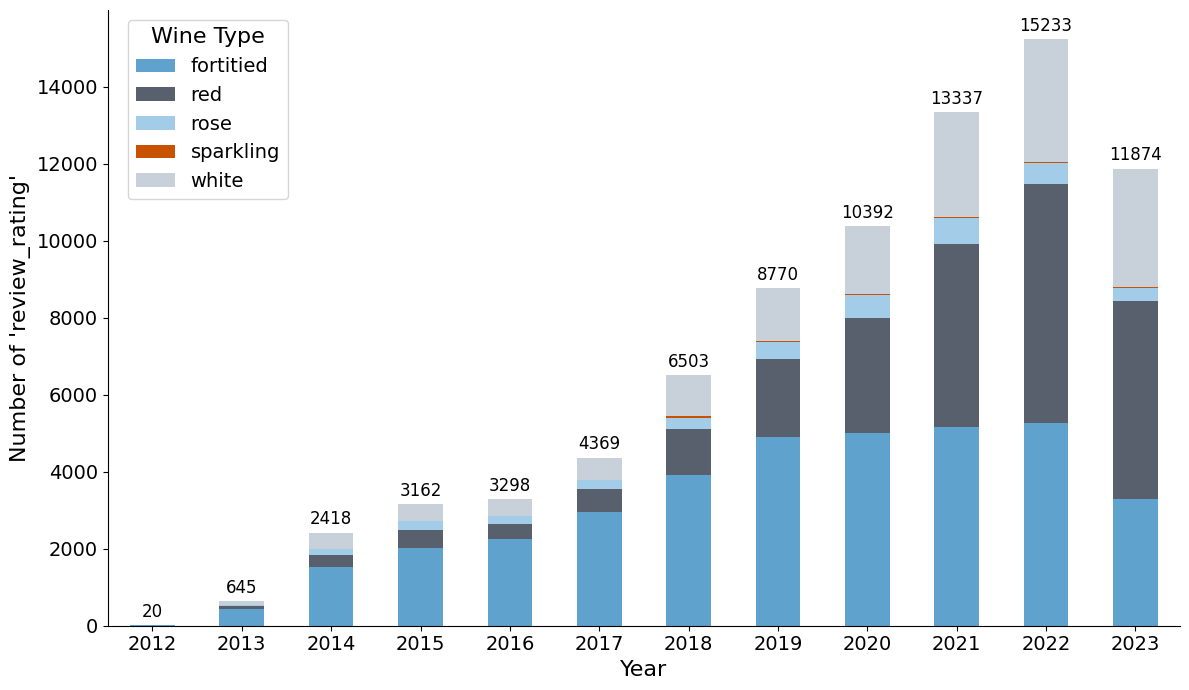

In [6]:
wine_colors = {
    'fortitied':  '#5FA2CE' ,  # Earthy brown, representing the rich and aged quality of fortified wines.
    'red':  '#57606C',  # Maroon, a deeper red to symbolize the classic red wine.
    'rose': '#A3CCE9',  # Soft pink, a lighter shade for the often delicate rose wines.
    'sparkling': '#C85200' ,  # Goldenrod, a bright and vibrant color for sparkling wines.
    'white': '#C8D0D9',  # Khaki, a subtle yellow-green, aligning with the lighter tones of white wines.
}


date_df = wine_df[['date_review', 'wine_type']]

# Convert date_review to datetime and extract year
date_df['date_review'] = pd.to_datetime(date_df['date_review'])
date_df['year'] = date_df['date_review'].dt.year

# Group by year and wine_type, and count the number of reviews
yearly_wine_type_counts = date_df.groupby(['year', 'wine_type']).size().reset_index(name='counts')

# Pivot the data to get years as index and wine types as columns filled with the counts
pivot_df = yearly_wine_type_counts.pivot(index='year', columns='wine_type', values='counts').fillna(0)

# Tableau color palette (omitting blue, orange, and grey)
tableau_colors = {'#E15759','#B07AA1','#FF9DA7','#9C755F', '#59A14F'}

# Plotting the stacked bar chart with the modified Tableau color palette
plt.figure(figsize=(12, 7), dpi=300)  # Set the figure size and dpi for high resolution

# Create a list of colors for each column in the order they appear in the DataFrame
column_colors = [wine_colors[wine_type] for wine_type in pivot_df.columns]

ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 7), color=column_colors)

plt.xlabel('Year', fontsize=16)
plt.ylabel("Number of 'review_rating'", fontsize=16)

plt.xticks(rotation=0, fontsize=14)  # Adjust font size for x-axis tick labels
plt.yticks(fontsize=14)  

# Set spine visibility
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show only left and bottom spines (i.e., y and x axes)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)

# Improve x-axis labels readability
plt.xticks(rotation=0)

# Grid only on the y-axis
plt.grid(False)

# Move the legend outside of the plot
# plt.legend(title='Wine Type', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.legend(title='Wine Type', fontsize=14, title_fontsize=16, bbox_to_anchor=(0.01, 1), loc='upper left')


# Calculate the total reviews per year and annotate above each stack
total_reviews_per_year = pivot_df.sum(axis=1)
for i, total in enumerate(total_reviews_per_year):
    ax.annotate(str(int(total)),  # Convert total to int to avoid decimal points
                xy=(i, total),  # Position (x,y) where the annotation should be
                xytext=(0, 3),  # Position (x,y) offset for the text label
                textcoords="offset points",  # How to interpret the text position
                ha='center',  # Horizontal alignment
                va='bottom',
                fontsize=12)  # Vertical alignment

# Tight layout to ensure everything fits without overlap
plt.tight_layout()


# Show the plot
plt.show()


In [7]:
# Define a mapping from the language codes to full language names with 'rest' for all other languages
language_full_names = {
    'en': 'English',
    'pt': 'Portuguese',
    'nl': 'Dutch',
    'da': 'Danish'
}

# Use a lambda function to apply the mapping to the 'language' column, defaulting to 'Rest' for other languages
wine_df['language_full_name'] = wine_df['user_language'].apply(lambda x: language_full_names.get(x, 'Rest'))

wine_df[['language_full_name', 'user_language']]

,language_full_name,user_language
0,English,en
1,English,en
2,English,en
3,Rest,ru
4,English,en
...,...,...
80016,English,en
80017,English,en
80018,English,en
80019,English,en


In [8]:
region_df = wine_df.groupby('region').agg(number_review=('review_id', 'count')).reset_index()

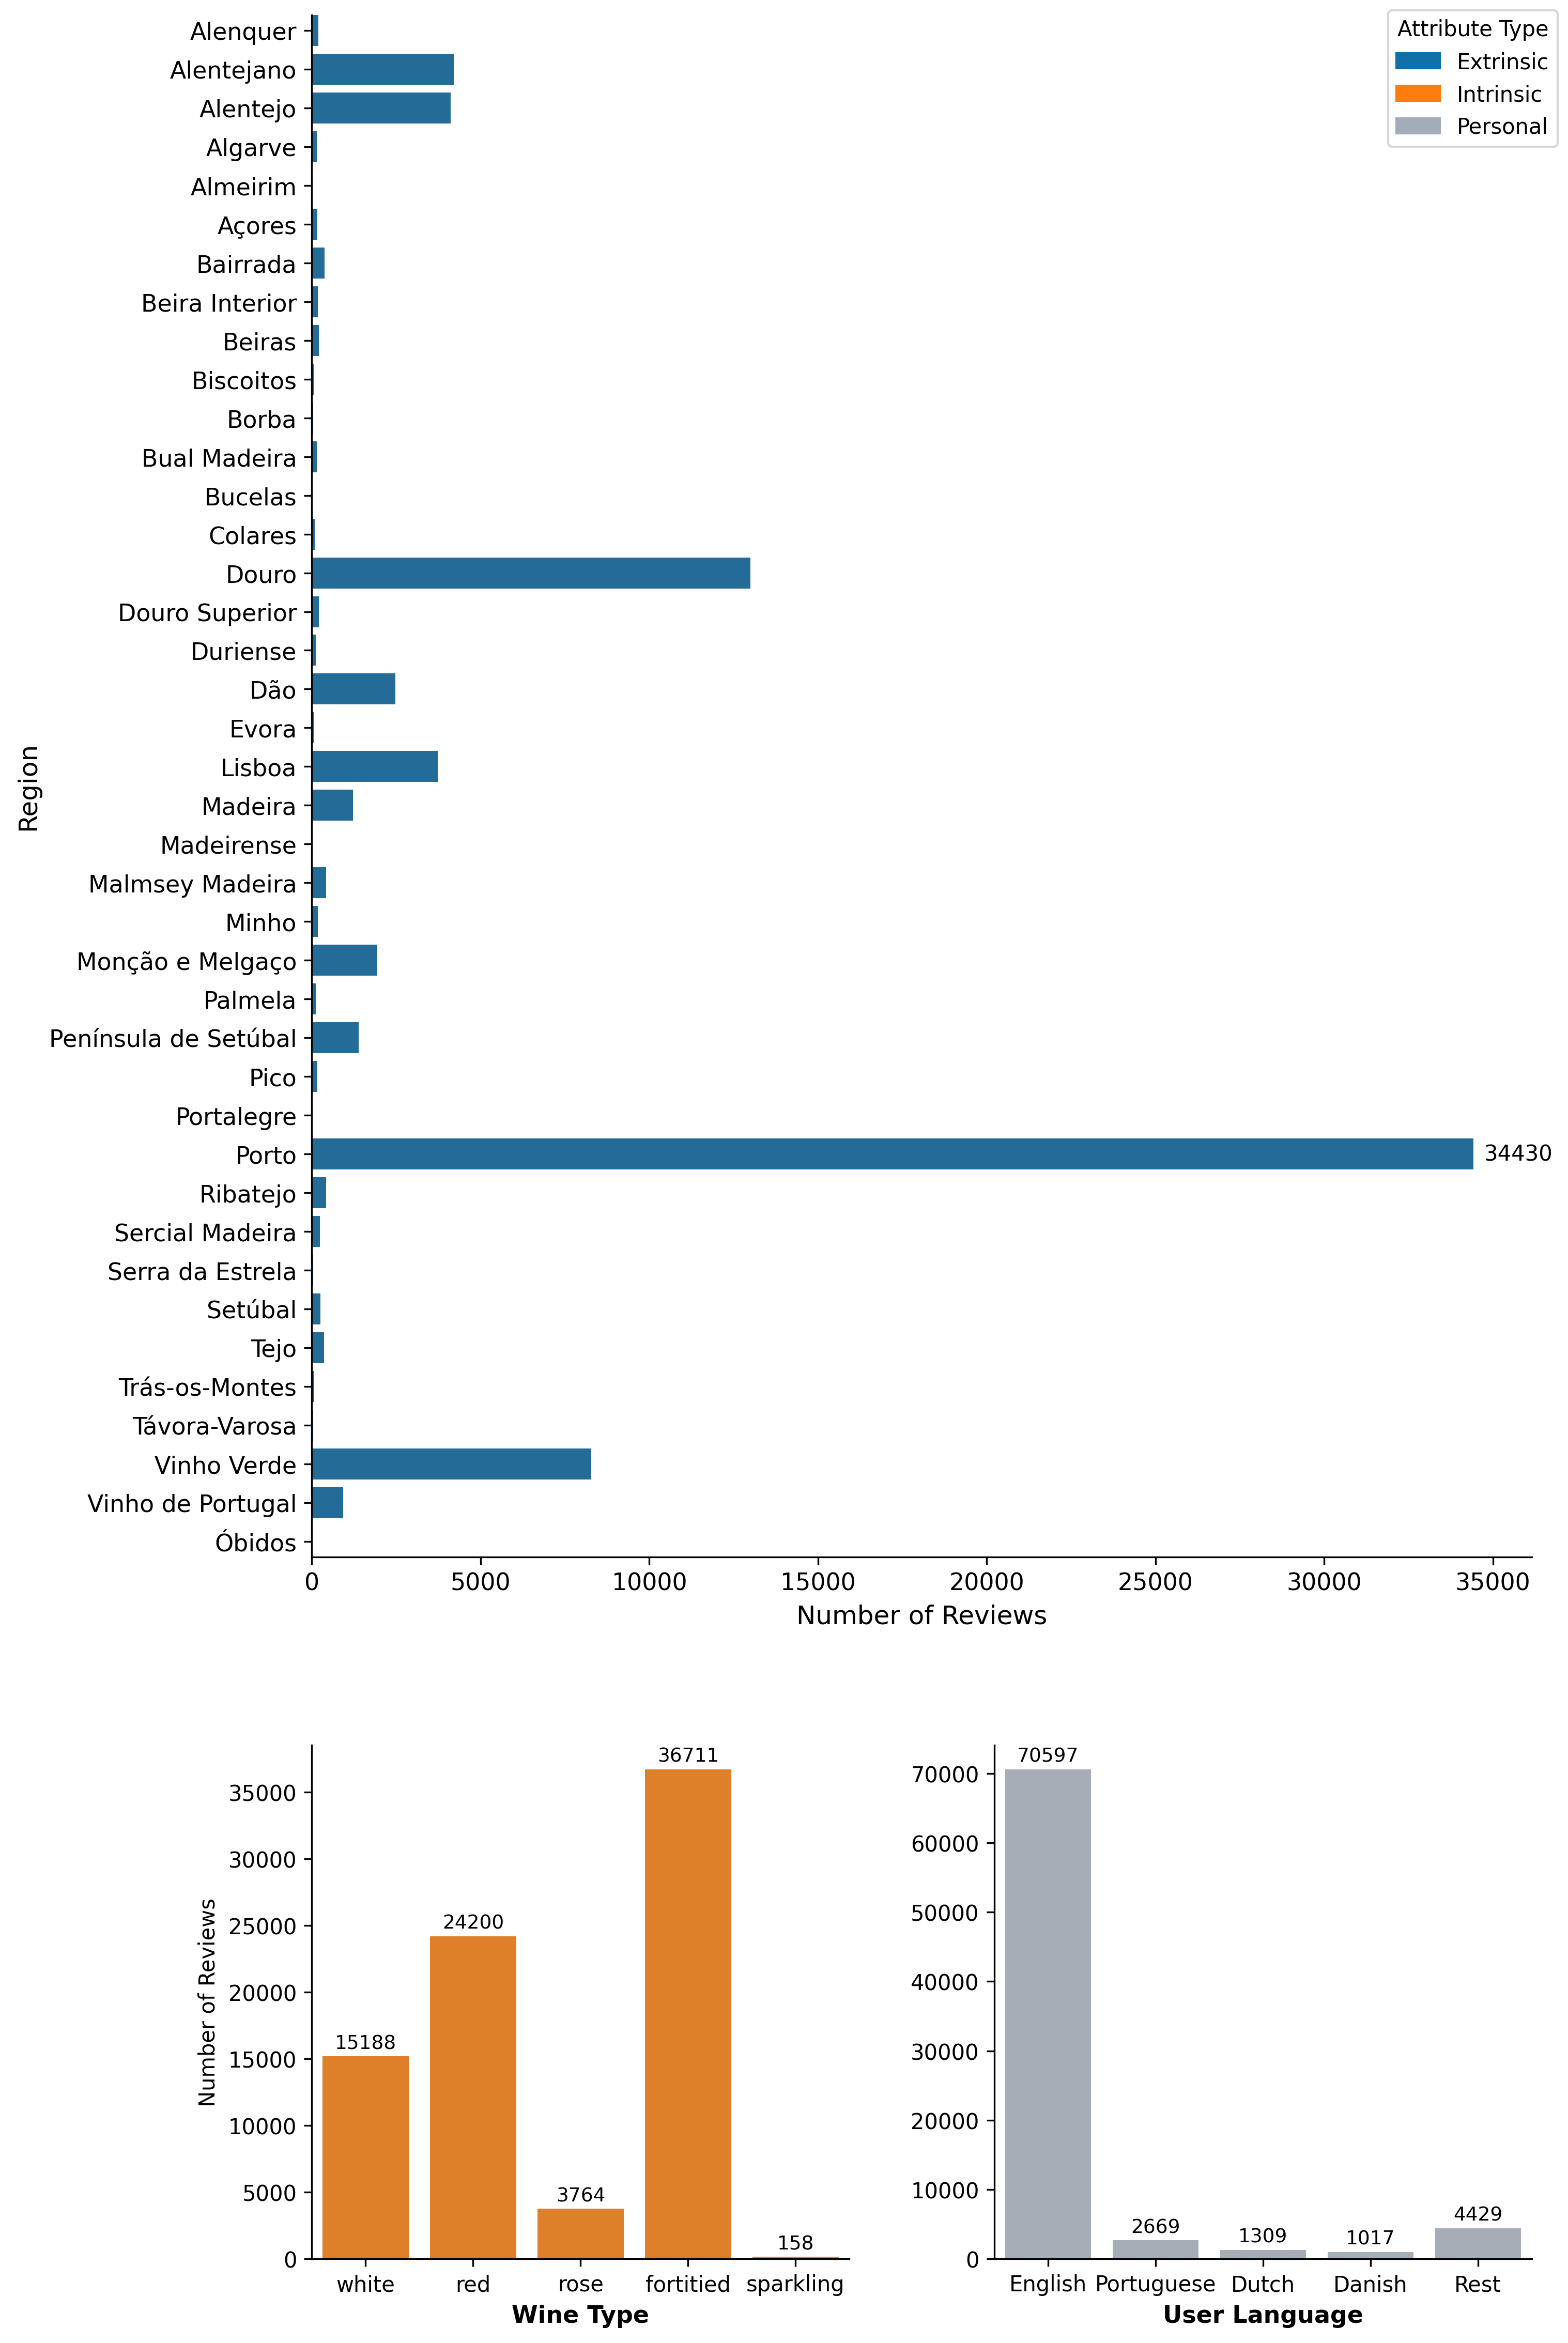

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import pandas as pd

import matplotlib.patches as mpatches



custom_order = ['English', 'Portuguese', 'Dutch', 'Danish', 'Rest'] 

# Create legend handles
extrinsic_patch = mpatches.Patch(color=extrinsic, label='Extrinsic')
intrinsic_patch = mpatches.Patch(color=intrinsic, label='Intrinsic')
personal_patch = mpatches.Patch(color=personal, label='Personal')

fig = plt.figure(figsize=(10,15 ), dpi=300, constrained_layout=True)

# Add these handles to the legend. You can add it to one of your axes or to the figure


gs = gridspec.GridSpec(4, 2, figure=fig, hspace=0.2) 

# Add the main plot at the top (spanning all columns of the first two rows)
ax1 = fig.add_subplot(gs[0:3, :])
# Plot the first graph (region reviews)
sns.barplot(y='region', x='number_review', data=region_df, ax=ax1, color=extrinsic)

# Find the maximum number of reviews for annotation
max_reviews = region_df['number_review'].max()

# Annotate the bar with the highest number of reviews
for p in ax1.patches:
    if p.get_width() == max_reviews:
        ax1.annotate(f"{int(p.get_width())}", (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                    textcoords='offset points')

ax1.set_xlabel('Number of Reviews', fontsize=12)
ax1.set_ylabel('Region', fontsize=12)

ax1.margins(y=0)

ax1.tick_params(axis='x', labelsize=11)
ax1.tick_params(axis='y', labelsize=11)

sns.despine(ax=ax1)


# Add the second plot at the bottom left (in the third row)
ax2 = fig.add_subplot(gs[3, 0])
# Plot the second graph (wine type count)
sns.countplot(x='wine_type', data=wine_df, ax=ax2, color=intrinsic)

for p in ax2.patches:
    ax2.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 6),
                textcoords='offset points')

# Set labels and other customizations for ax2...
ax2.set_xlabel('Wine Type', fontsize=11, fontweight='bold')
ax2.set_ylabel('Number of Reviews', fontsize=10)

ax2.tick_params(axis='x', labelsize=10)
ax2.tick_params(axis='y', labelsize=10)

sns.despine(ax=ax1)

# Add the third plot at the bottom right (in the third row)
ax3 = fig.add_subplot(gs[3, 1])
# Plot the third graph (language full name count)
sns.countplot(x='language_full_name', data=wine_df, ax=ax3, order=custom_order, color=personal)
# Set labels and other customizations for ax3...
sns.despine()

for p in ax3.patches:
    ax3.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 6),
                textcoords='offset points')
    
ax3.set_xlabel('User Language', fontsize=11, fontweight='bold')
ax3.set_ylabel(' ', fontsize=10)

ax3.tick_params(axis='x', labelsize=10)
ax3.tick_params(axis='y', labelsize=10)

# # Adjust the layout
# plt.tight_layout()

fig.legend(title= 'Attribute Type',handles=[extrinsic_patch, intrinsic_patch, personal_patch], loc='upper right', fontsize=10)

# Show the combined plot
plt.show()

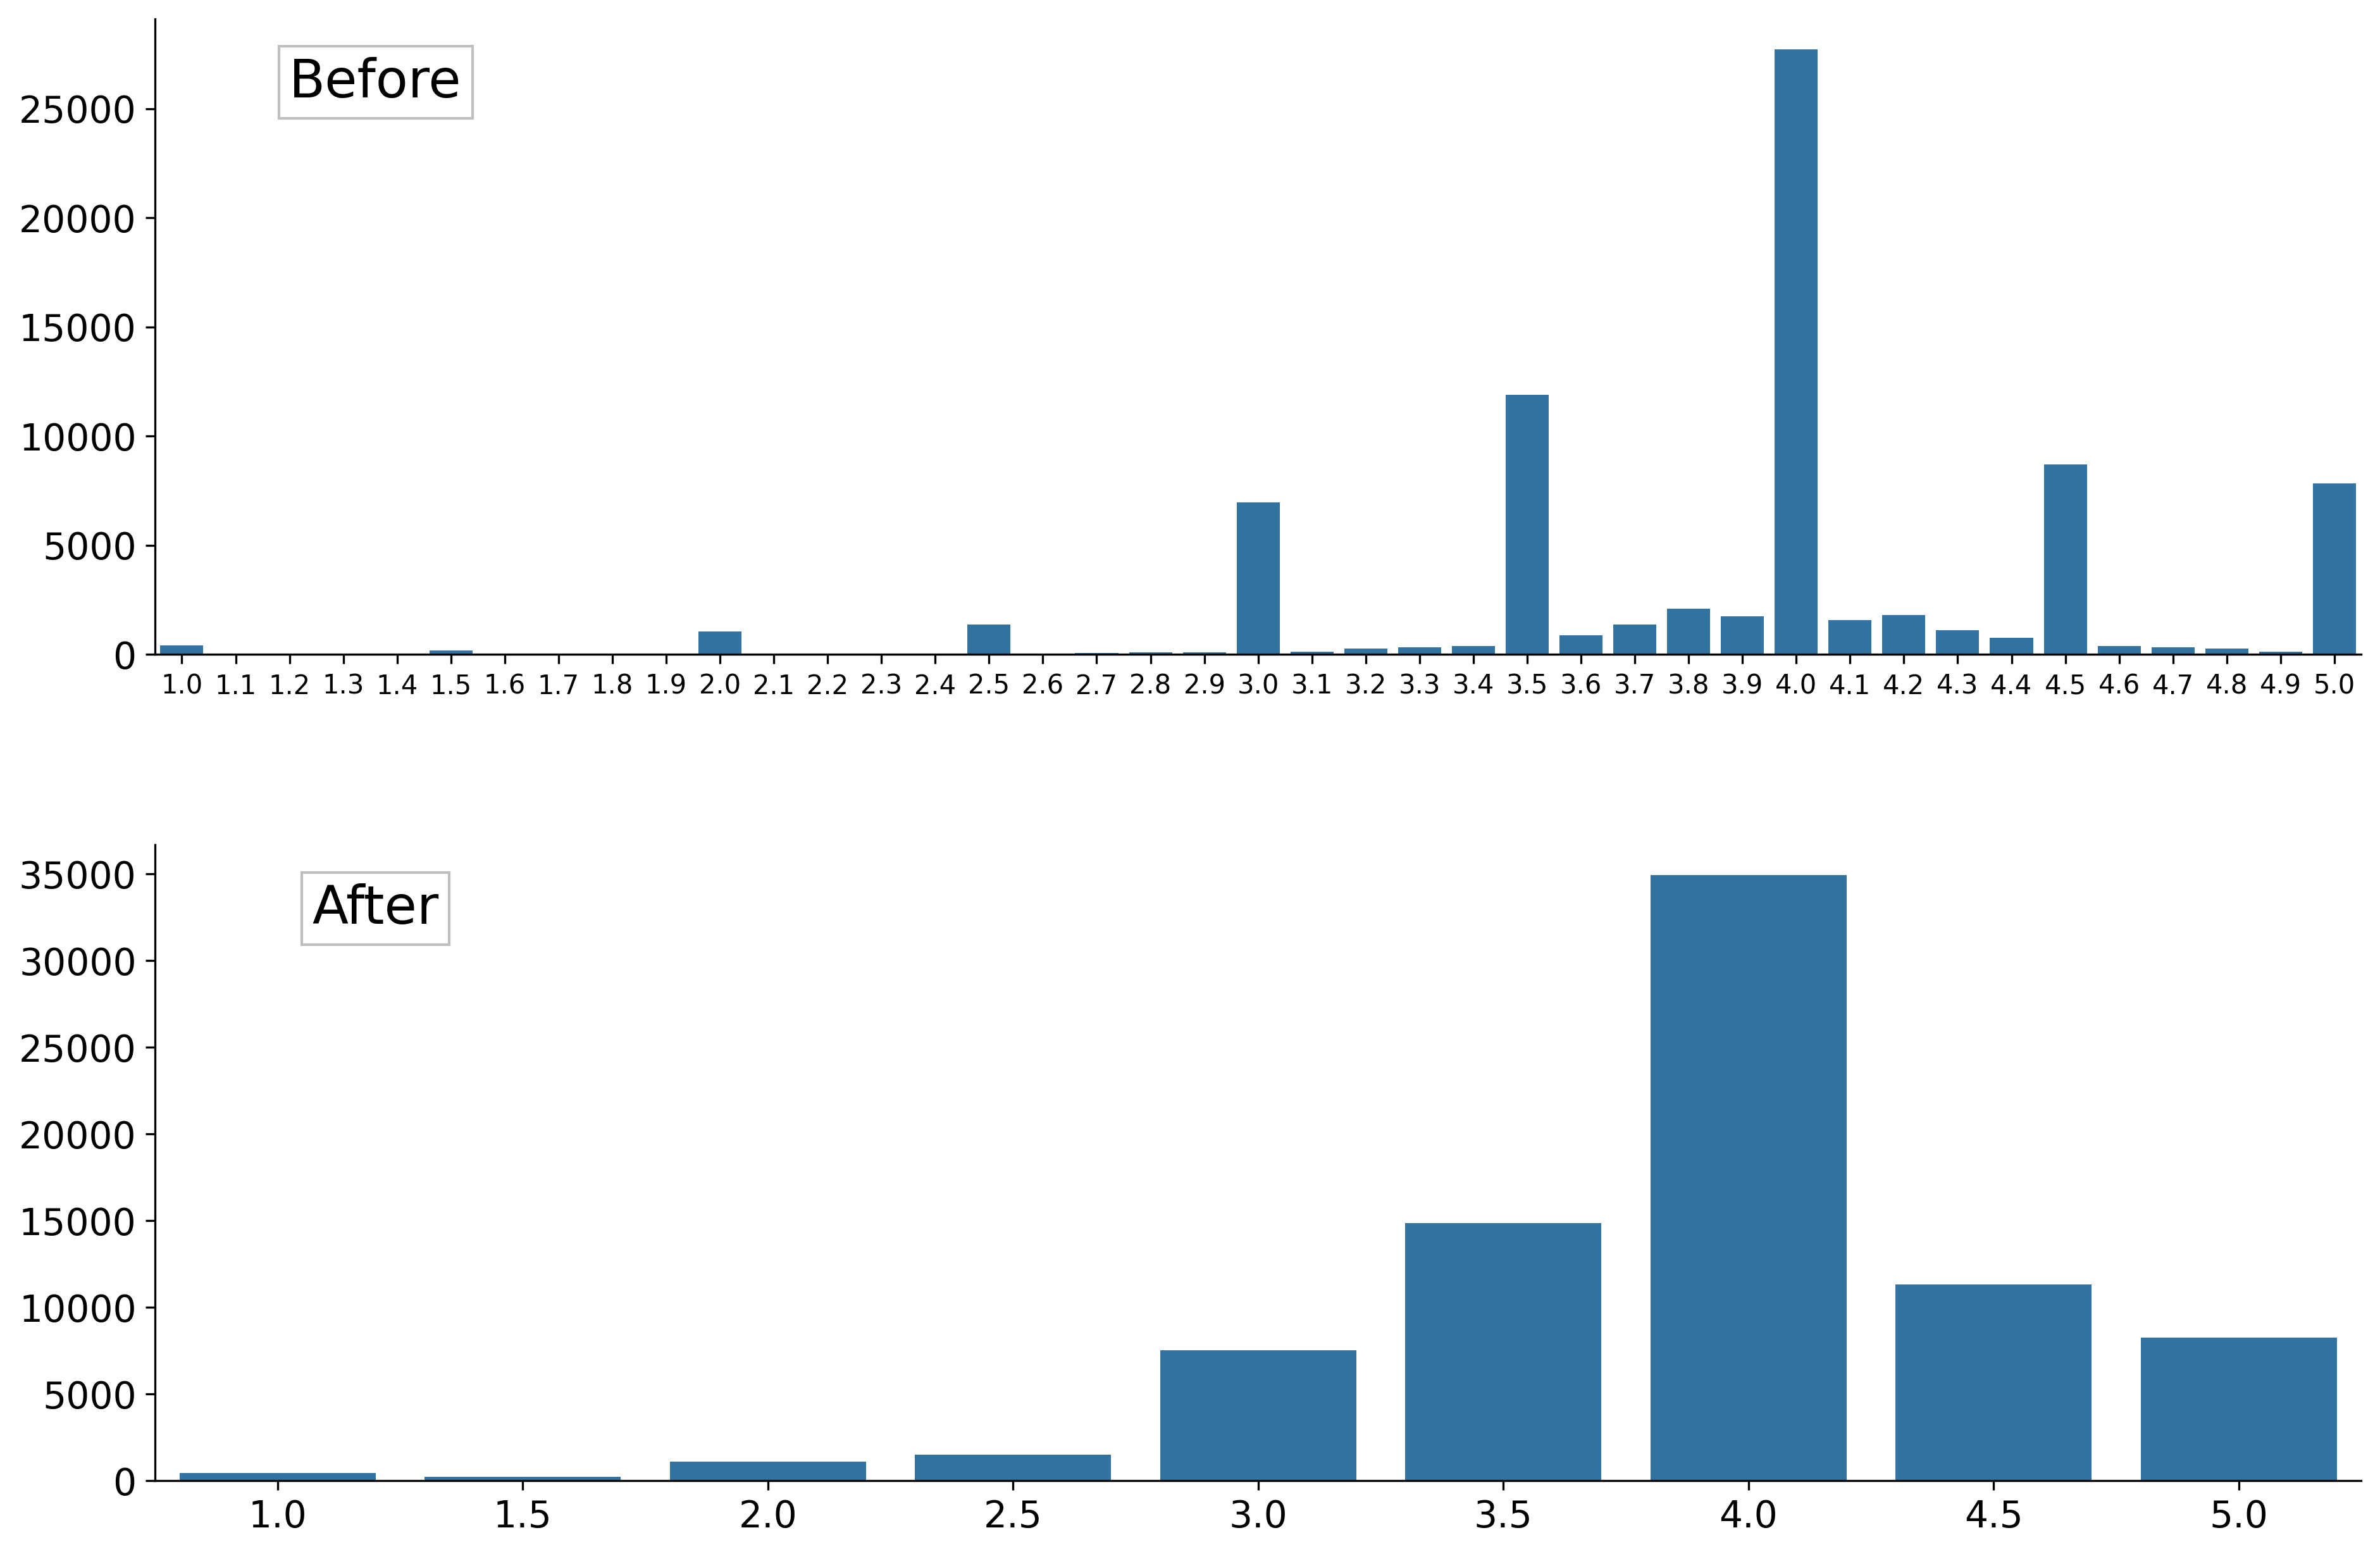

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10), dpi=300)

# First subplot
plt.subplot(2, 1, 1)
sns.countplot(x='rating', data=wine_df, color="#1f77b4")
plt.xlabel('', fontsize=16)  # Adjust font size as needed
plt.ylabel('', fontsize=16)  # Adjust font size as needed
plt.xticks(fontsize=10)      # Adjust font size for x-axis tick labels
plt.yticks(fontsize=14)      # Adjust font size for y-axis tick labels
sns.despine()

# Adding a text box with a grey frame for "Before"
plt.text(0.1, 0.9, 'Before', horizontalalignment='center', verticalalignment='center', 
         transform=plt.gca().transAxes, fontsize=20,  # Increased fontsize
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='grey'))

# Second subplot
plt.subplot(2, 1, 2)
sns.countplot(x='rating_label', data=wine_df, color="#1f77b4")
plt.xlabel('', fontsize=16)  # Adjust font size as needed
plt.ylabel('', fontsize=16)  # Adjust font size as needed
plt.xticks(fontsize=14)      # Adjust font size for x-axis tick labels
plt.yticks(fontsize=14)      # Adjust font size for y-axis tick labels
sns.despine()

# Adding a text box with a grey frame for "After"
plt.text(0.1, 0.9, 'After', horizontalalignment='center', verticalalignment='center', 
         transform=plt.gca().transAxes, fontsize=20,  # Increased fontsize
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='grey'))

# Increase the vertical space between the plots
plt.subplots_adjust(hspace=0.3)  # Adjust this value as needed for your figure

# Show the plot
plt.show()



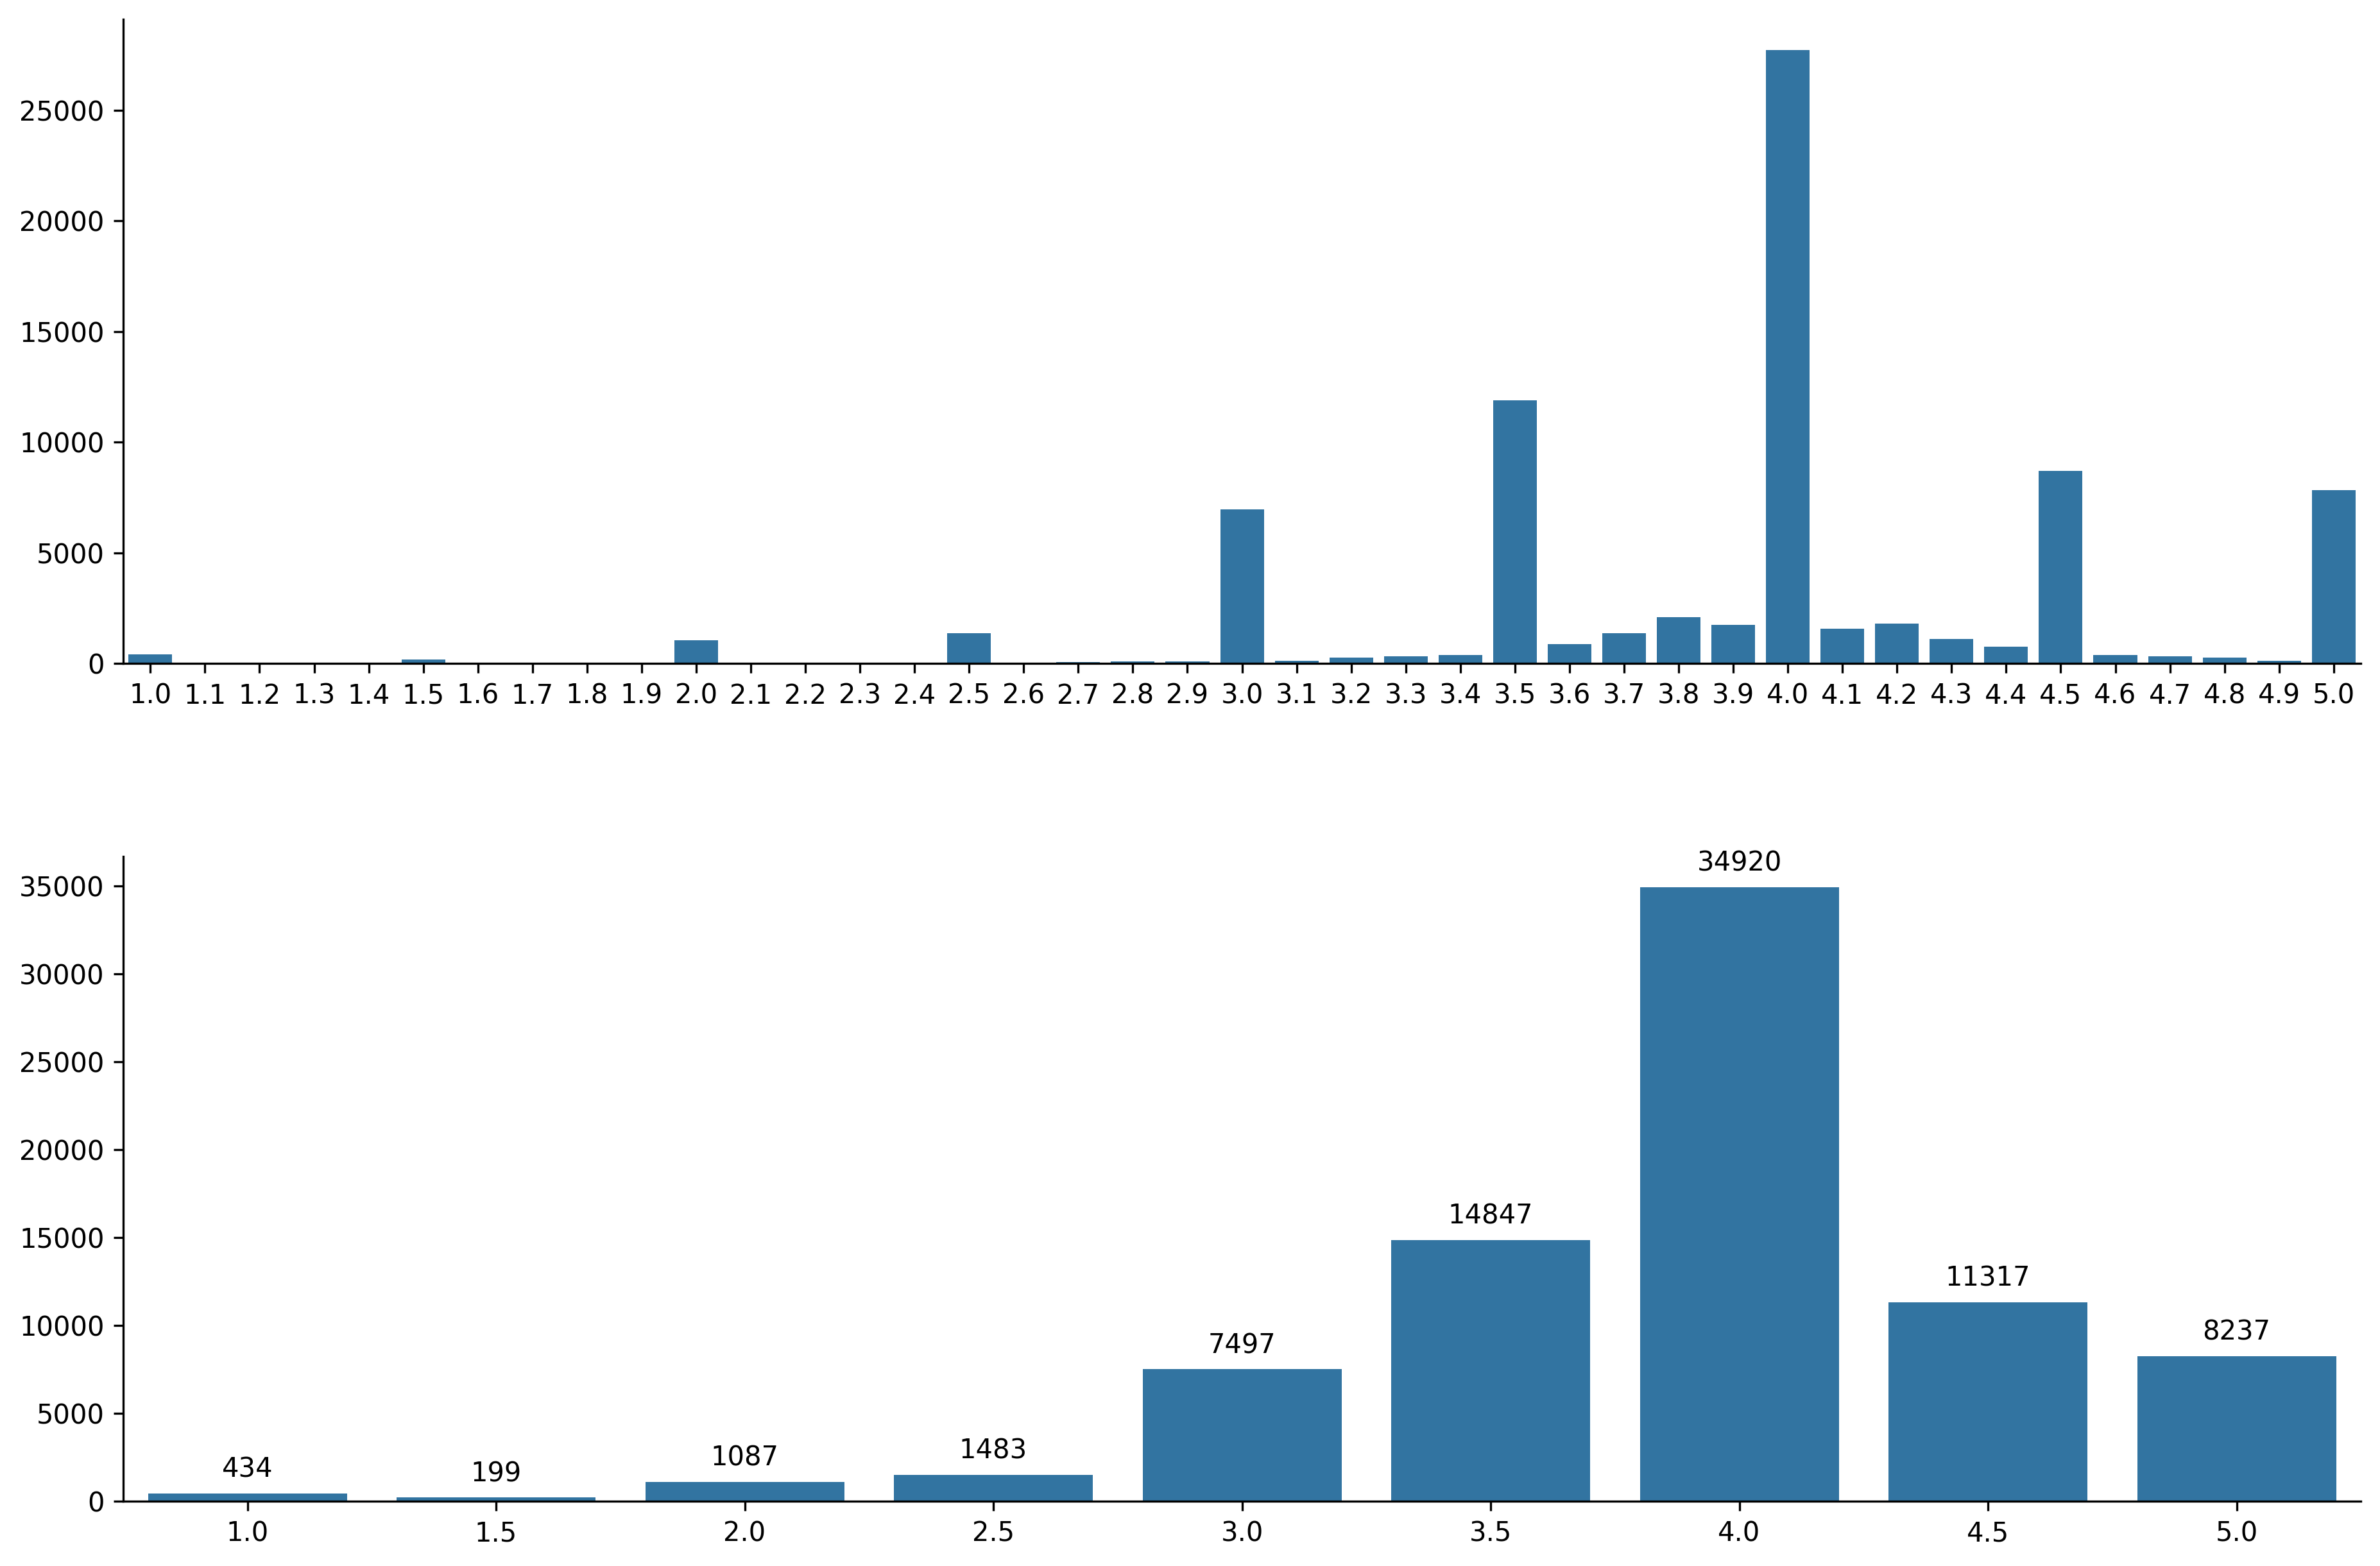

In [11]:
plt.figure(figsize=(15, 10), dpi=300)

# First subplot
plt.subplot(2, 1, 1)
sns.countplot(x='rating', data=wine_df, color="#1f77b4")
plt.xlabel('')
plt.ylabel('')
sns.despine()

# Second subplot
plt.subplot(2, 1, 2)
barplot_2 = sns.countplot(x='rating_label', data=wine_df, color="#1f77b4")
plt.xlabel('')
plt.ylabel('')
sns.despine()

# Annotate each bar in the second subplot
for p in barplot_2.patches:
    barplot_2.annotate(str(int(p.get_height())), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')

# Increase the vertical space between the plots
plt.subplots_adjust(hspace=0.3)

# Show the plot
plt.show()


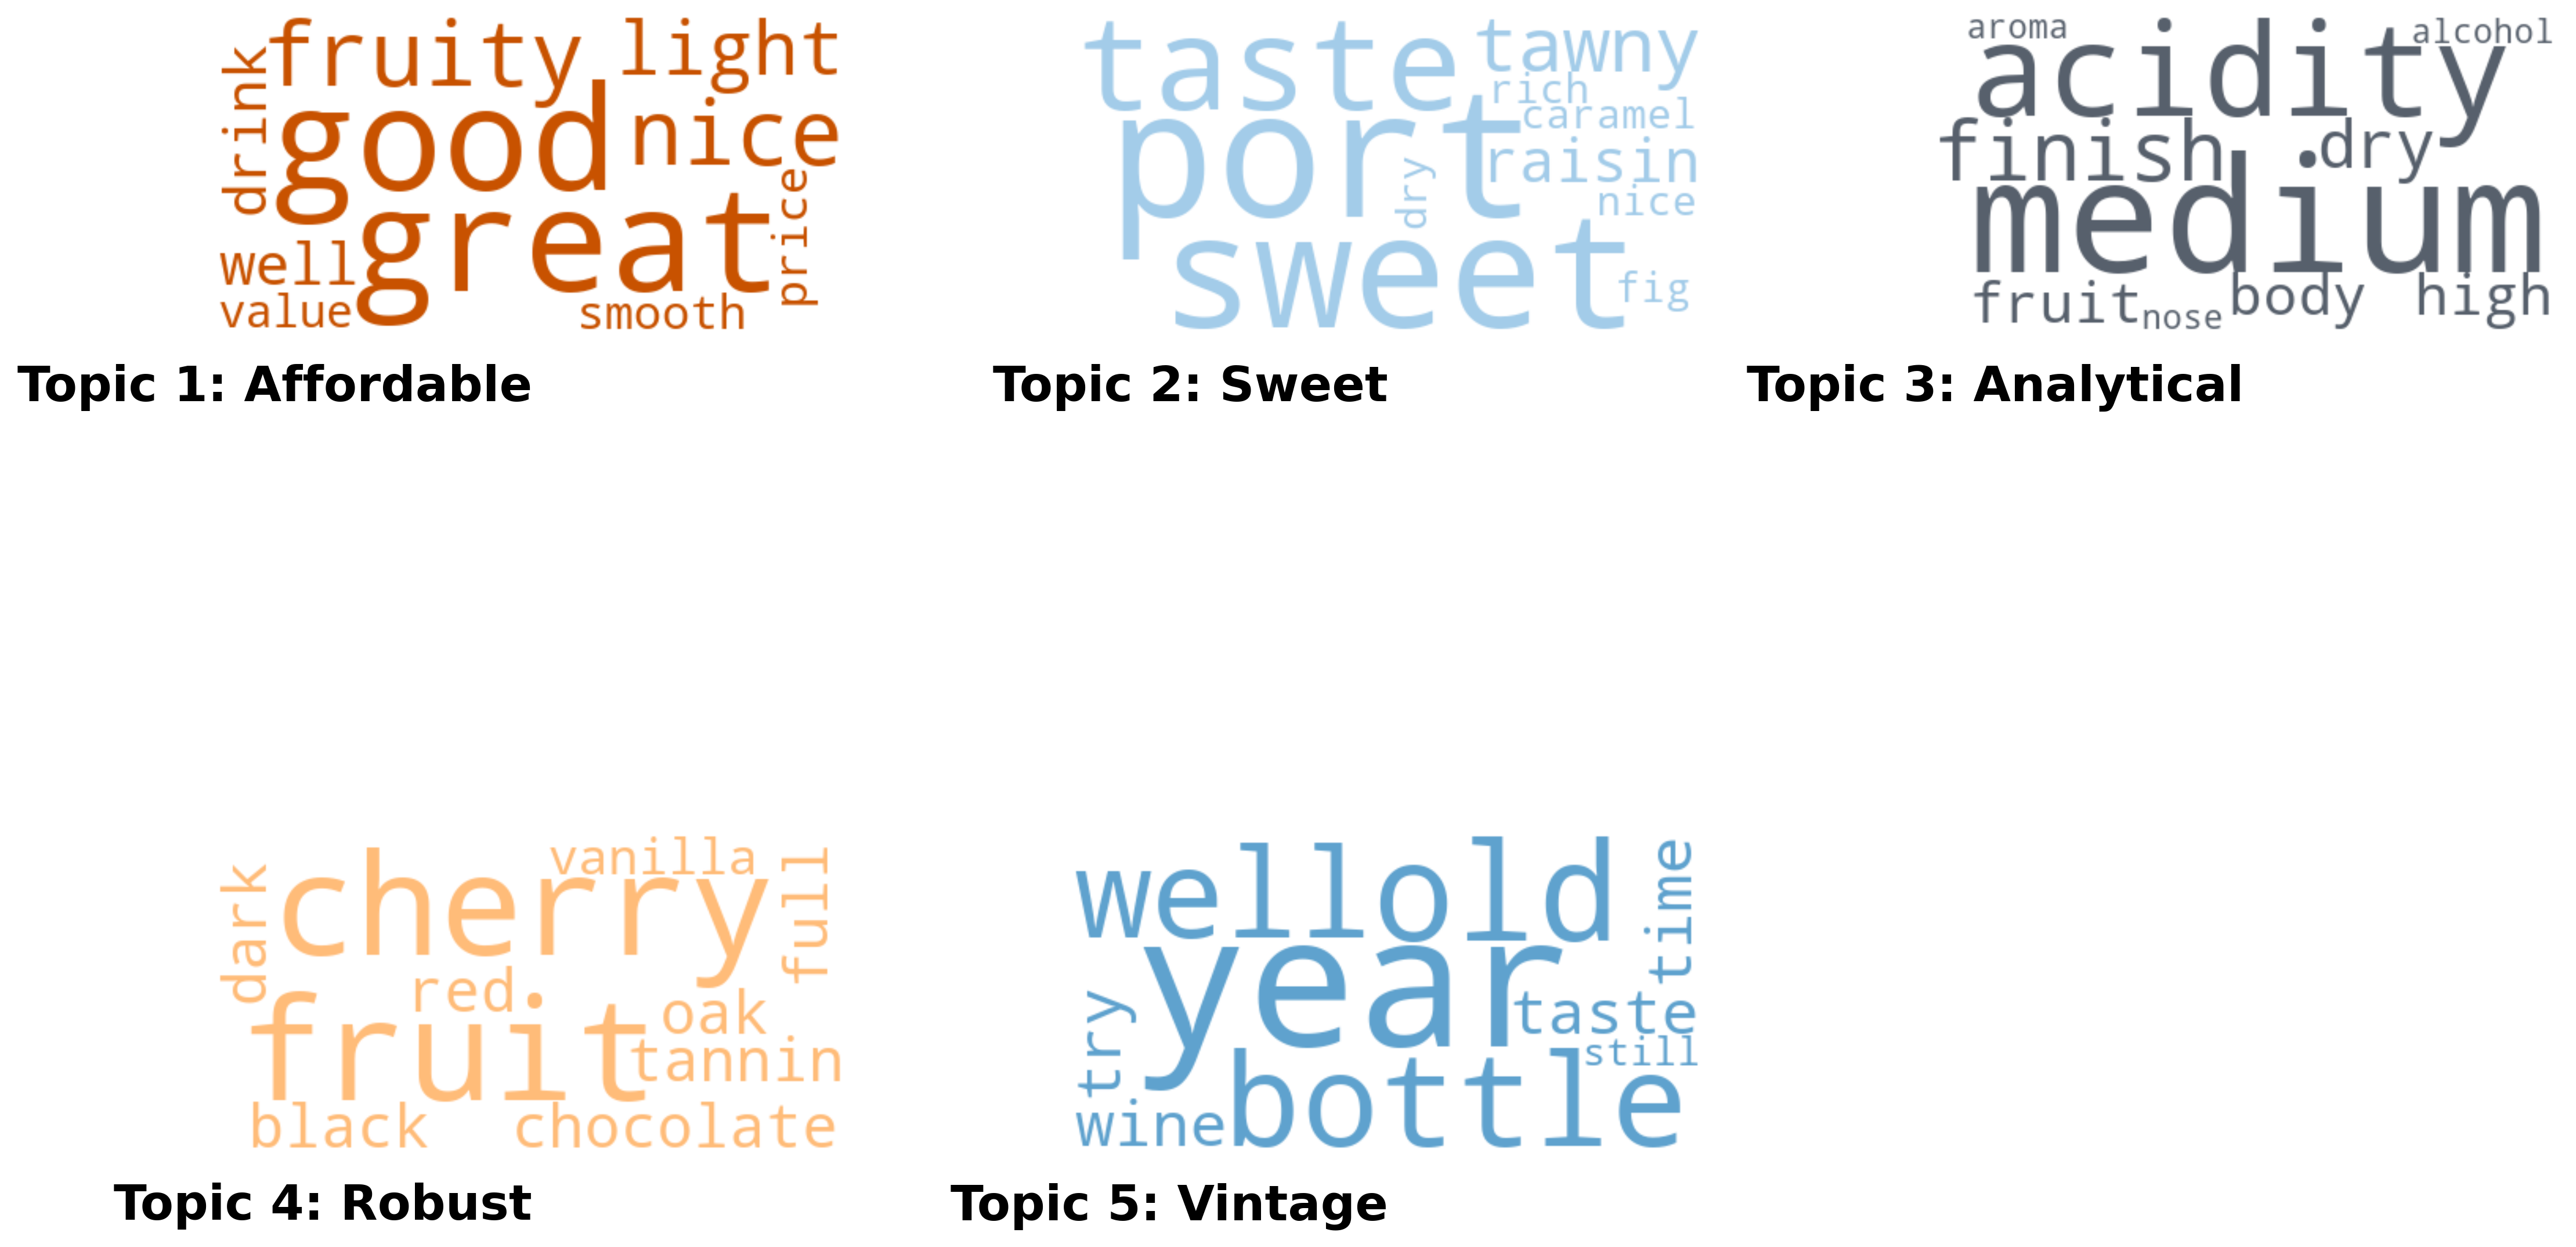

In [12]:
# Updated color codes for each category using the provided wine colors
categories = {
    "Topic 1: Affordable": ["good", "great", "fruity", "nice", "light", "well", "drink", "smooth", "price", "value"],
    "Topic 2: Sweet": ["port", "sweet", "taste", "tawny", "raisin", "caramel", "fig", "nice", "rich", "dry"],
    "Topic 3: Analytical": ["medium", "acidity", "finish", "dry", "high", "fruit", "body", "alcohol", "nose", "aroma"],
    "Topic 4: Robust": ["fruit", "cherry", "chocolate", "tannin", "oak", "red", "black", "dark", "full", "vanilla"],
    "Topic 5: Vintage": ["year", "old", "bottle", "well", "taste", "time", "get", "try", "wine", "still"]
}


wine_colors = {
    'fortified': '#5FA2CE',  # Earthy brown
    'red': '#57606C',        # Maroon
    'rose': '#A3CCE9',       # Soft pink
    'sparkling': '#C85200',  # Goldenrod
    'white': '#FFBC79'       # Khaki
}

categories_colors = {
    "Topic 1: Affordable": wine_colors['sparkling'],
    "Topic 2: Sweet": wine_colors['rose'],
    "Topic 3: Analytical": wine_colors['red'],
    "Topic 4: Robust": wine_colors['white'],
    "Topic 5: Vintage": wine_colors['fortified']
}


fig, axs = plt.subplots(2, 3, figsize=(15, 10), dpi=300)
axs = axs.flatten()  # Flatten the 2D array of axes

# Generate and plot word clouds for each category
for i, (category, words) in enumerate(categories.items()):
    wordcloud = WordCloud(
        width=400, height=200, background_color='white',
        color_func=lambda *args, **kwargs: categories_colors[category]
    ).generate(" ".join(words))

    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].axis('off')

    # Adding category names as subtitles below the word clouds
    axs[i].text(0.5, -0.1, category, transform=axs[i].transAxes,fontweight='bold', fontsize=20, va='top', ha='right')

# Remove the last (empty) subplot
plt.delaxes(axs[-1])

plt.tight_layout()
plt.show()